In [1]:
import pandas as pd

In [3]:
#loading data
df = pd.read_csv("crime_data.csv")

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [9]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
#Using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_features = scaler.transform(df)

In [14]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns)

In [15]:
df_feat.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [18]:
from sklearn.cluster import KMeans
#Initializing K-Means
km = KMeans(n_clusters=3, random_state=355)

In [20]:
y_pred = km.fit_predict(df)
y_pred

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2])

In [21]:
print(km.cluster_centers_)
print(km.inertia_)

[[ 11.8125     272.5625      68.3125      28.375     ]
 [  4.27        87.55        59.75        14.39      ]
 [  8.21428571 173.28571429  70.64285714  22.84285714]]
47964.26535714286


In [37]:
#Using k values in range of 1 to 15
sse = []
k = range(1,15)
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)

In [38]:
sse

[355807.8215999999,
 96399.02814449917,
 47964.26535714286,
 34728.62935714286,
 24423.58322077922,
 18768.000666666667,
 15779.449714285714,
 13329.361976190476,
 12042.838333333333,
 10211.33130952381,
 9016.939642857142,
 8411.292976190476,
 7418.765666666666,
 6638.294833333333]

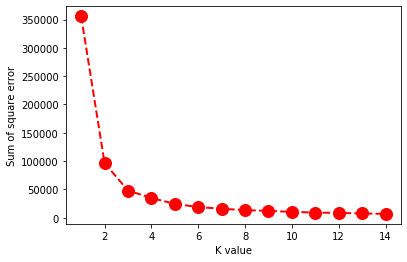

In [42]:
#Elbow Plot
import matplotlib.pyplot as plt
plt.xlabel('K value')
plt.ylabel('Sum of square error')
plt.plot(k, sse, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)

Here we can clearly see that k value is lies in between 2 to 4 i.e. 3. So, number of cluster will be formed are 3 in this case